# Introducción
Vamos a realizar la visualización y análisis de los datos de Menorca extraídos de Insideairbnb.com, un sitio web en el que se publican conjuntos de datos extraídos de la web de "instantáneas" de diferentes ciudades.

Este análisis tiene como objetivo comprender la oferta de Airbnb en Menorca, identificar patrones de precios y disponibilidad, y evaluar el impacto del turismo en la isla.

<br>
<center><img src="https://cdn.getyourguide.com/img/location/595255192e441.jpeg/88.jpg" width="800" height="500"></center>
<br>

Vamos a trabajar con la siguiente Data:<br>
`listings.csv.gz`: Detailed Listings data<br>
`calendar.csv.gz`: Detailed Calendar Data<br>
`reviews.csv.gz`: Detailed Review Data<br>
`listings.csv`: Summary information and metrics for listings in Menorca (good for visualisations)<br>
`reviews.csv`: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)<br>
`neighbourhoods.csv`: Neighbourhood list for geo filter. Sourced from city or open source GIS files<br>
`neighbourhoods.geojson`: GeoJSON file of neighbourhoods of the city<br>

Esta ha sido extraída de `https://insideairbnb.com/get-the-data`. Los archivos `listings.csv.gz`, `calendar.csv.gz` y `reviews.csv.gz` han sido descomprimidos y renombrados como `listings_data.csv`, `calendar_data.csv` y `reviews_data.csv`

Finalmente, vamos a comenzar a procesar estos datos, aunque solo estaremos utilizando `listings.csv`, `listings_data.csv`, `calendar_data.csv` y `reviews_data.csv`. Estos no los vamos a juntar, al contar con información que usaremos para diferentes partes del análisis.


# 1. Importando módulos y datos
## 1.1 Importar módulos

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


## 1.2 Import data from desk

In [8]:
listings = pd.read_csv(r'C:\Users\maarp\OneDrive\Escritorio\bootcamp_data\14_Data_Storytelling\data\listings.csv', index_col= "id")
listings_data = pd.read_csv(r'C:\Users\maarp\OneDrive\Escritorio\bootcamp_data\14_Data_Storytelling\data\listings_data.csv', index_col= "id", low_memory=False)
calendar_data= pd.read_csv(r'C:\Users\maarp\OneDrive\Escritorio\bootcamp_data\14_Data_Storytelling\data\calendar_data.csv', parse_dates=['date'], index_col=['listing_id'])
reviews_data = pd.read_csv(r'C:\Users\maarp\OneDrive\Escritorio\bootcamp_data\14_Data_Storytelling\data\reviews_data.csv', parse_dates=['date'])

C:\Users\maarp\AppData\Local\Temp\ipykernel_17200\1476860044.py:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [10]:
listings_data.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [11]:
print(listings.shape)


(3312, 17)


In [12]:
print(listings_data.shape)

(3312, 74)


In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 102558 to 1057800023527172654
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3312 non-null   object 
 1   host_id                         3312 non-null   int64  
 2   host_name                       3312 non-null   object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   3312 non-null   object 
 5   latitude                        3312 non-null   float64
 6   longitude                       3312 non-null   float64
 7   room_type                       3312 non-null   object 
 8   price                           3279 non-null   float64
 9   minimum_nights                  3312 non-null   int64  
 10  number_of_reviews               3312 non-null   int64  
 11  last_review                     2580 non-null   object 
 12  reviews_per_month  

In [14]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 813510689749810728 to 38449773
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3312 non-null   object 
 1   scrape_id                                     3312 non-null   int64  
 2   last_scraped                                  3312 non-null   object 
 3   source                                        3312 non-null   object 
 4   name                                          3312 non-null   object 
 5   description                                   0 non-null      float64
 6   neighborhood_overview                         1584 non-null   object 
 7   picture_url                                   3312 non-null   object 
 8   host_id                                       3312 non-null   int64  
 9   host_url                                      3

## 1.3 Eliminar datos null
Comenzamos por eliminar las columnas que no contienen ningún dato

In [15]:
print(listings.isnull().sum())

name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3312
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                               33
minimum_nights                       0
number_of_reviews                    0
last_review                        732
reviews_per_month                  732
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1308
dtype: int64


In [16]:
print(listings_data.isnull().sum())

listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               732
Length: 74, dtype: int64


In [17]:
listings.dropna(axis=1, how='all')
listings_data.dropna(axis=1, how='all')
calendar_data.dropna(axis=1, how='all')
reviews_data.dropna(axis=1, how='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...
1,10803,3369053,2013-01-18,1763045,Julie,Perfect isnt enough! Lindsay was the best host...
2,10803,3403930,2013-01-23,4423532,Ivonne,Living with Lindsay was very relaxed. The room...
3,10803,3514479,2013-02-11,4551787,Jess,"Beautiful home, great location very friendly a..."
4,10803,3662039,2013-03-01,632036,Yvonne And Pip,It was great staying at Lindsay's apartment. H...
...,...,...,...,...,...,...
798254,1107888180591889715,1111209710376578268,2024-03-13,135246149,Monique,Bill is very friendly and welcomed me in perso...
798255,1107888180591889715,1112594378879659673,2024-03-14,104216643,Surya,Bill was just awesome as his place.<br/>One of...
798256,1107888180591889715,1113326601770811850,2024-03-15,104216643,Surya,Just a wonderful host and a wonderful . Everyt...
798257,1107888180591889715,1114062651431629618,2024-03-16,133442492,Janet,"Fabulous place - very clean, fresh and all new..."


In [18]:
listings.drop('last_review', axis=1, inplace=True)
listings.drop('reviews_per_month', axis=1, inplace=True)

In [19]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [20]:
listings_data.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [21]:
calendar_data.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [22]:
reviews_data.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [23]:
listings_data.drop(columns=["neighbourhood"])

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
813510689749810728,https://www.airbnb.com/rooms/813510689749810728,20231230181110,2023-12-30,city scrape,Hotel in Ciutadella de Menorca · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,246981743,https://www.airbnb.com/users/show/246981743,...,NaN,NaN,NaN,NaN,f,5,0,5,0,NaN
804531586347501368,https://www.airbnb.com/rooms/804531586347501368,20231230181110,2023-12-30,city scrape,Villa in Cala Blanca · 3 bedrooms · 5 beds · 3...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,266459123,https://www.airbnb.com/users/show/266459123,...,5.00,5.00,5.00,ET/0989,t,8,8,0,0,0.13
875010042492651638,https://www.airbnb.com/rooms/875010042492651638,20231230181110,2023-12-30,city scrape,Home in Binibèquer · 5 bedrooms · 6 beds · 3.5...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,80396607,https://www.airbnb.com/users/show/80396607,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
36499413,https://www.airbnb.com/rooms/36499413,20231230181110,2023-12-30,previous scrape,Villa in Torre del Ram · 5 bedrooms · 8 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/11bbaf62-6d1b...,274426255,https://www.airbnb.com/users/show/274426255,...,NaN,NaN,NaN,1333,f,1,1,0,0,NaN
901940744056978144,https://www.airbnb.com/rooms/901940744056978144,20231230181110,2023-12-30,city scrape,Home in Cala en Bosc · ★5.0 · 4 bedrooms · 6 b...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,122553261,https://www.airbnb.com/users/show/122553261,...,5.00,4.67,4.67,NaN,f,1,1,0,0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43749345,https://www.airbnb.com/rooms/43749345,20231230181110,2023-12-30,city scrape,Chalet in Ciutadella de Menorca · ★4.61 · 4 be...,NaN,NaN,https://a0.muscache.com/pictures/e84ade47-71e5...,157248245,https://www.airbnb.com/users/show/157248245,...,4.67,4.72,4.56,NaN,t,3,3,0,0,0.62
1333452,https://www.airbnb.com/rooms/1333452,20231230181110,2023-12-30,city scrape,Chalet in Ciutadella de Menorca · ★5.0 · 5 bed...,NaN,Zona muy tranquila.,https://a0.muscache.com/pictures/ca817877-f775...,7232438,https://www.airbnb.com/users/show/7232438,...,5.00,4.90,5.00,VT869ME,t,1,1,0,0,0.33
40047791,https://www.airbnb.com/rooms/40047791,20231230181110,2023-12-30,city scrape,Villa in Sant Lluís · 5 bedrooms · 9 beds · 3 ...,NaN,Airport - 14.1 km<br />Beach - 1.4 km<br />Res...,https://a0.muscache.com/pictures/prohost-api/H...,14113470,https://www.airbnb.com/users/show/14113470,...,NaN,NaN,NaN,ET0991ME,t,98,98,0,0,NaN


In [24]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "amenities"]
nuevo_listings = pd.merge(listings, listings_data[target_columns], on='id', how='left')
nuevo_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 102558 to 1057800023527172654
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3312 non-null   object 
 1   host_id                         3312 non-null   int64  
 2   host_name                       3312 non-null   object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   3312 non-null   object 
 5   latitude                        3312 non-null   float64
 6   longitude                       3312 non-null   float64
 7   room_type                       3312 non-null   object 
 8   price                           3279 non-null   float64
 9   minimum_nights                  3312 non-null   int64  
 10  number_of_reviews               3312 non-null   int64  
 11  calculated_host_listings_count  3312 non-null   int64  
 12  availability_365   

## 1. 4 Modificar outliers

Text(0.5, 1.0, 'Antes de la Corrección de Outliers')

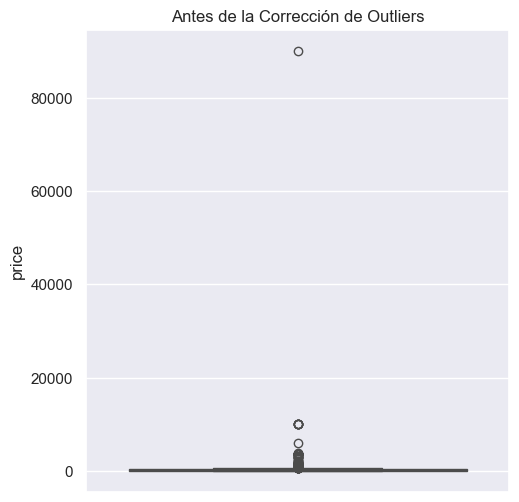

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=nuevo_listings['price'])
plt.title('Antes de la Corrección de Outliers')

In [26]:
Q1 = nuevo_listings['price'].quantile(0.25)
Q3 = nuevo_listings['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

nuevo_listings['price'] = nuevo_listings['price'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print(nuevo_listings)

                                                                  name  \
id                                                                       
102558               Rental unit in Ciutadella de Menorca · ★4.66 ·...   
285865               Rental unit in Menorca · ★4.30 · 1 bedroom · 1...   
294398               Home in Alaior · ★4.55 · 9 bedrooms · 13 beds ...   
295705               Cottage in Alaior · ★4.83 · 11 bedrooms · 15 b...   
334376               Home in Menorca · ★4.71 · 3 bedrooms · 3 beds ...   
...                                                                ...   
1056313946952067472  Home in Cala Galdana · ★New · 4 bedrooms · 7 b...   
1057080438466759777  Home in Alaior · ★New · 4 bedrooms · 6 beds · ...   
1057729653110768266  Villa in Cala Galdana · ★New · 3 bedrooms · 5 ...   
1057729925743989246  Villa in Cala Galdana · ★New · 4 bedrooms · 6 ...   
1057800023527172654  Villa in Cap d'en Font · ★New · 5 bedrooms · 9...   

                       host_id       

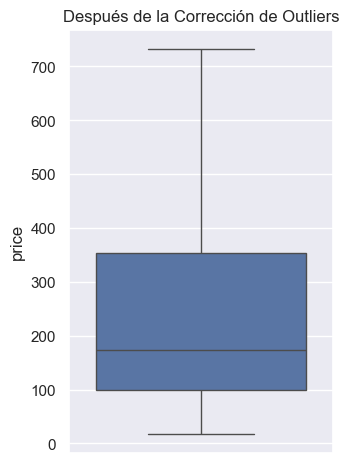

In [27]:
plt.subplot(1, 2, 2)
sns.boxplot(y=nuevo_listings['price'])
plt.title('Después de la Corrección de Outliers')

plt.tight_layout()
plt.show()

In [28]:
listings['price'].fillna(listings['price'].mean(), inplace=True)

# 2. Análisis exploratorio

## 2.1 Vecindario
La isla de Menorca uenta con ocho municipios: Maó, Ciutadella, Alaior, Es Castell, Sant Lluís, Es Mercadal, Ferreries y Es Migjorn Gran, aunque cerca de un 65% de la población se concentra en las ciudades de Maó y Ciutadella. 

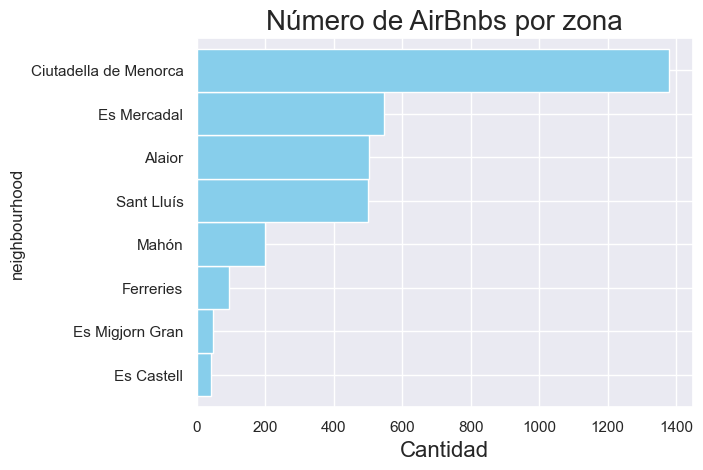

In [29]:
neighbourhood = nuevo_listings['neighbourhood'].value_counts().sort_values(ascending=True)
neighbourhood.plot.barh(width=1, color='skyblue')
plt.title("Número de AirBnbs por zona", fontsize=20)
plt.xlabel('Cantidad', fontsize=16)
plt.show()

Podemos observar que la zona con más apartamentos turísticos es Ciudadella de Menorca, seguido por Mercadal y Alaior (que cuentan con menos de la mitad que Ciudadella). A continuación se muestra un mapa con la consecuente distribución de estos AirBnbs

In [30]:
lats2023 = nuevo_listings['latitude'].tolist()
lons2023 = nuevo_listings['longitude'].tolist()
locations = list(zip(lats2023, lons2023))

map1 = folium.Map(location=[39.980566, 4.081079], zoom_start=9.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 2. 2 Precio por vecindario
A continuación vamos a observar el precio medio para una habitación de dos personas en diferentes localizaciones de la isla. Comenzamos arreglando los datos de la columna `price` con el fin de no obtener ningún error.

In [31]:
price_neighbourhood = nuevo_listings[nuevo_listings['accommodates']==2]
price_neighbourhood['price'] = price_neighbourhood['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
price_neighbourhood['price']

C:\Users\maarp\AppData\Local\Temp\ipykernel_17200\2333475665.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id
382144                  90.0
434190                  60.0
494480                  64.0
596553                 180.0
932244                  55.0
                       ...  
1041079318950441134    400.0
1043889328749267020     60.0
1047164583952092317     33.0
1049836714156934417    732.5
1050776070238388399    188.0
Name: price, Length: 312, dtype: float64

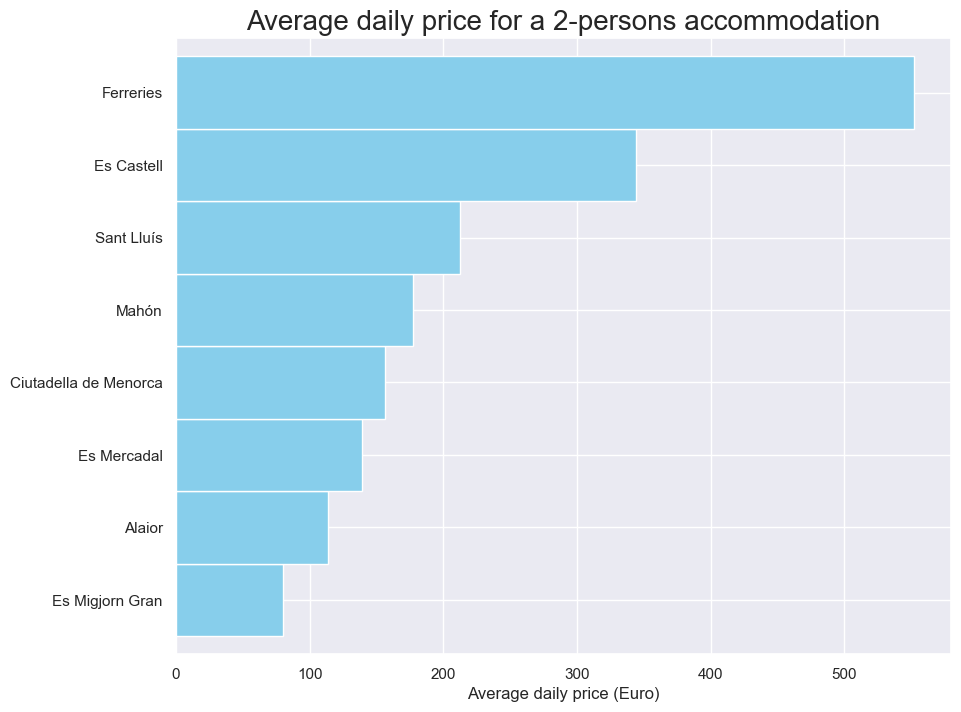

In [32]:
precio_vecindario = nuevo_listings[nuevo_listings['accommodates']==2]
precio_vecindario = precio_vecindario.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
precio_vecindario.plot.barh(figsize=(10, 8), color='skyblue', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

Observamos que Ferreries es el municipio con los hospedajes más caros, con un precio medio superior a los 550 dólares por noche para dos personas, seguido de Es Castell, con un precio cercano a los 350 dólares. Por el lado contrario, el municipio más asequible es Es Migjorn Gran, con un precio medio inferior a los 100 dólares, seguido de Alaior, con un precio medio algo superior a los 100 dólares.

Cabe resaltar que los precios en este dataset no varían a lo largo del año, por lo que se toman unos datos estáticos que suponemos que serán una media de los precios de todo el año.

## 2.3 Tipos de propiedades y habitaciones

### 2.3.1 Tipos de habitaciones

El tipo de habitación es muy importante en Menorca, porque nos muestra que son aquellos que se dedican a Real State profesionalmente los que alquilan las viviendas, mientras que los isleños apenas comparten sus viviendas. 

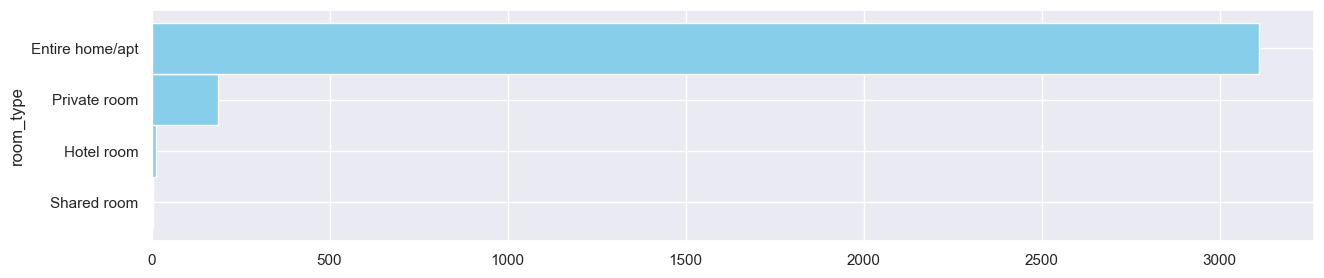

In [33]:
freq = nuevo_listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color='skyblue')
plt.show()

Como efectivamente hemos observado, las casas/apartamentos enteros son los que más se alquilan en esta aplicación, seguido de las habitaciones privadas y con un porcentaje muy bajo de habitaciones compartidas y habitaciones de hotel

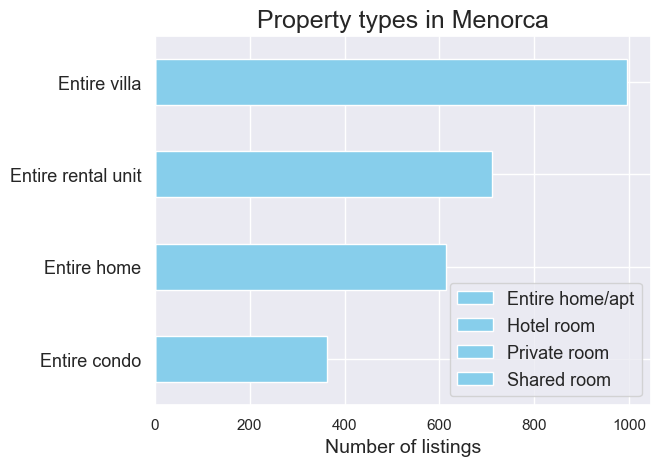

In [34]:
prop = nuevo_listings.groupby(['property_type', 'room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.sum(axis=1)
prop = prop.sort_values(by='total')
prop = prop[prop['total'] >= 200]
prop = prop.drop(columns=['total'])

# Graficar
ax = prop.plot(kind='barh', stacked=True, color='skyblue', grid=True)

# Títulos y etiquetas
plt.title('Property types in Menorca', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc=4, prop={"size": 13})
plt.yticks(fontsize=13)

# Mostrar la gráfica
plt.show()

En esta gráfica se puede observar con más claridad cómo los tipos de propiedades más comunes son casas/apartamentos completos, al no encontrar ni una pizca de otro color que no sea el rojo.

## 2. 4 Número de alojados y relación con el precio

Como suele ocurrir, la mayor parte de alojamientos listados en AirBnb son para dos huéspedes, seguidos de los de 4 y los de 6. Podemos observar que hay alojamientos de hasta 16 personas, el máximo permitido por AirBnb

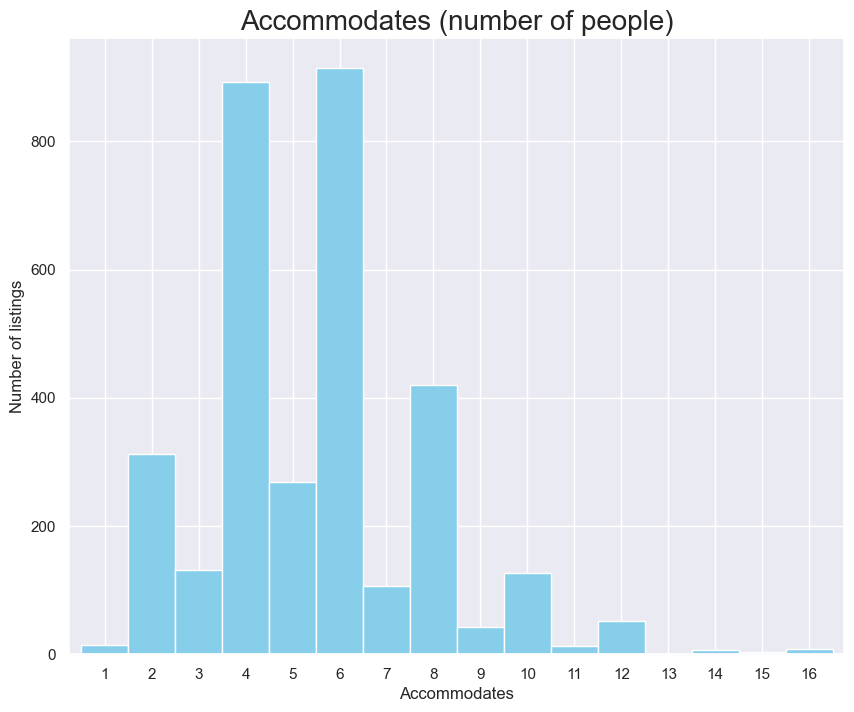

In [35]:
feq=nuevo_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='skyblue', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

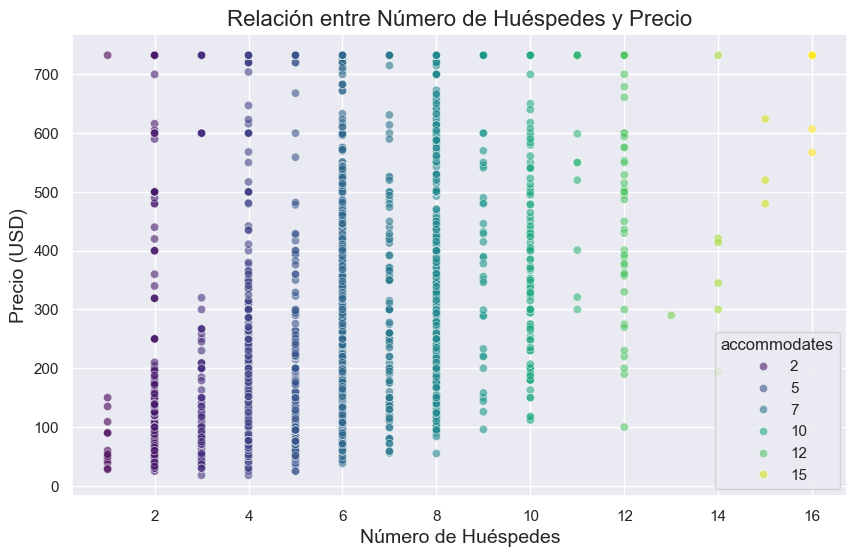

In [36]:
nuevo_listings['price'] = nuevo_listings['price'].astype(float)

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nuevo_listings, x='accommodates', y='price', hue='accommodates', palette='viridis', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('Número de Huéspedes', fontsize=14)
plt.ylabel('Precio (USD)', fontsize=14)
plt.title('Relación entre Número de Huéspedes y Precio', fontsize=16)

# Mostrar la gráfica
plt.show()

Este diagrama de dispersión muestra la relación entre el número de huéspedes y el precio por noche de la vivienda. En ella podemos observar que el precio es proporcional al número de huéspedes con una sola excepción.

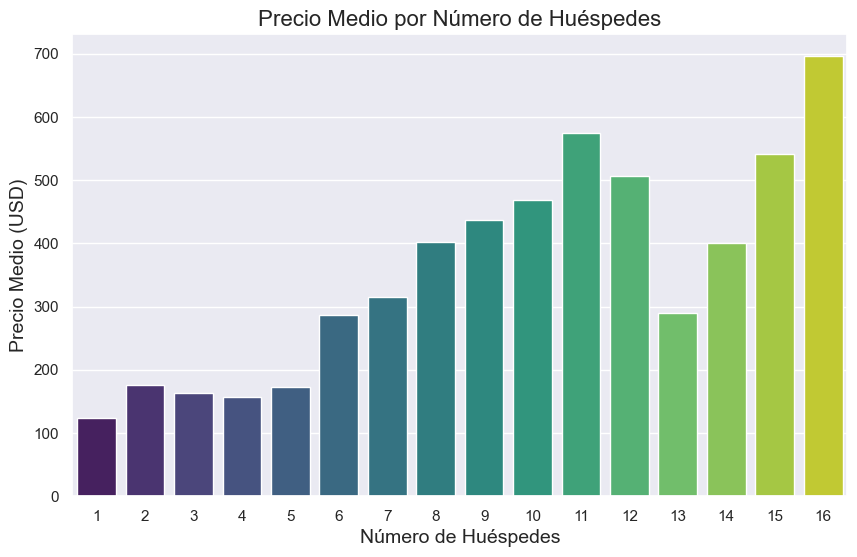

In [37]:
nuevo_listings['price'] = nuevo_listings['price'].astype(float)

# Calcular el precio medio para cada número de huéspedes
mean_price = nuevo_listings.groupby('accommodates')['price'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_price, x='accommodates', y='price', palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Número de Huéspedes', fontsize=14)
plt.ylabel('Precio Medio (USD)', fontsize=14)
plt.title('Precio Medio por Número de Huéspedes', fontsize=16)

# Mostrar la gráfica
plt.show()

Aquí podemos observar la excepción con más claridad. El alojamiento apto para 13 personas no es proporcional al tratarse de una excepción, seguramente debido a que solo hay una propiedad para ese número de personas y con un precio bastante aceptable.

## 2. 5 Puntuación de los alojamientos 


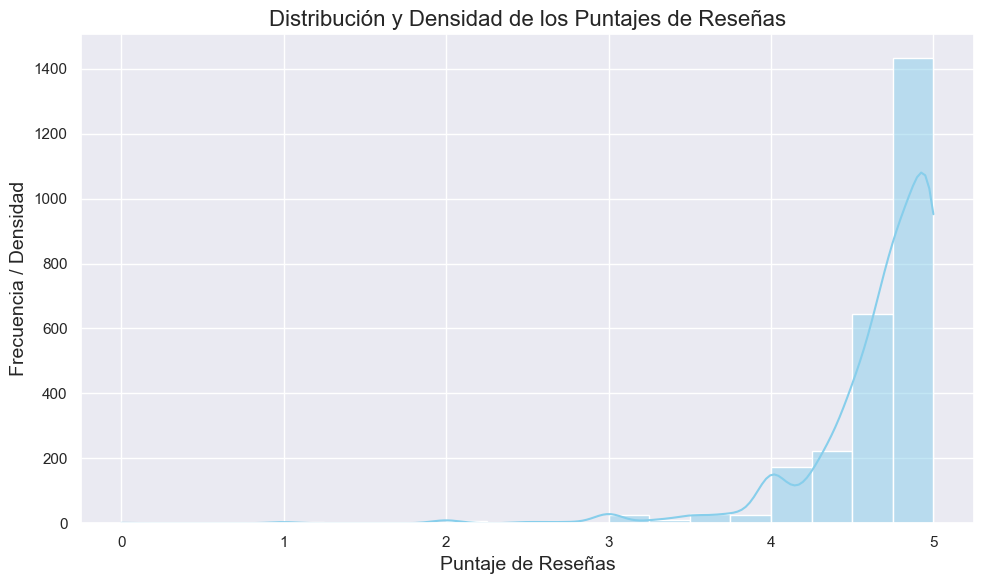

In [38]:
plt.figure(figsize=(10, 6))

# Histograma y gráfico de densidad superpuesto
sns.histplot(nuevo_listings['review_scores_rating'], kde=True, bins=20, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Puntaje de Reseñas', fontsize=14)
plt.ylabel('Frecuencia / Densidad', fontsize=14)
plt.title('Distribución y Densidad de los Puntajes de Reseñas', fontsize=16)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## 2. 6 Número mínimo de noches

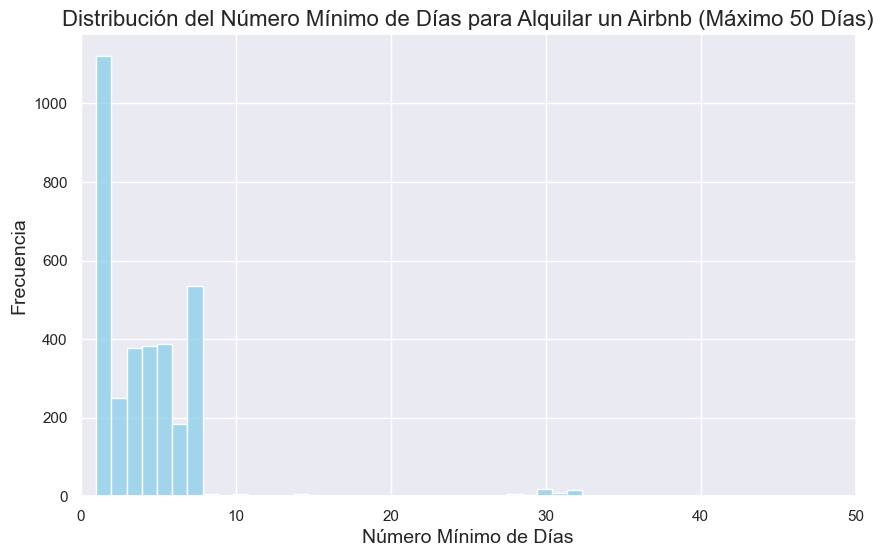

In [39]:
filtered_listings = nuevo_listings[nuevo_listings['minimum_nights'] <= 50]

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_listings, x='minimum_nights', bins=50, kde=False, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número Mínimo de Días', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución del Número Mínimo de Días para Alquilar un Airbnb (Máximo 50 Días)', fontsize=16)

# Ajustar los límites del eje x para mayor claridad
plt.xlim(0, 50)

# Mostrar la gráfica
plt.show()

Observamos que a pesar de haber muchos alojamientos que no piden un mínimo de noches, hay otras que piden desde 2 a 7 noches de estancia mínima. tambien encontramos algunos propietarios que prefieren a los turistas de larga estancia, pidiendo entre 30 y 32 días de estancia mínima.

# 3. Análisis de los hosts
A continuación analizaremos diversas características de los hosts para entender quienes son los verdaderos dueños de estos apartamentos.

In [40]:
host_reviews = nuevo_listings.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name='number_of_reviews')

# Calcular el promedio de 'review_scores_rating' para cada host
host_avg_rating = nuevo_listings.groupby(['host_id', 'host_name'])['review_scores_rating'].mean().to_frame(name='average_review_score')

# Unir los dataframes
host_reviews = host_reviews.join(host_avg_rating)

# Mostrar las primeras filas del resultado
print(host_reviews.head())


                        number_of_reviews  average_review_score
host_id   host_name                                            
515028500 Villa Plus                  199              4.600000
14113470  Solmar                       98              4.449773
105711740 3Villas                      96              4.607292
384045316 World2Meet                   51              4.593902
101497420 MauterVillas                 41              4.316250


Estos son los hosts que cuentan con un mayor número de reviews, y su correspondiente nota media a partir de las valoraciones de los usuarios.

Aquí observamos que Villa Plus encabeza la lista con 199 reviews y un 4.6 de puntuación media, seguido de Solmar con 98 reviews una media de 4.45 y 3Villas con 96 y una nota media de 4.61.

# 3. 1 Primera review

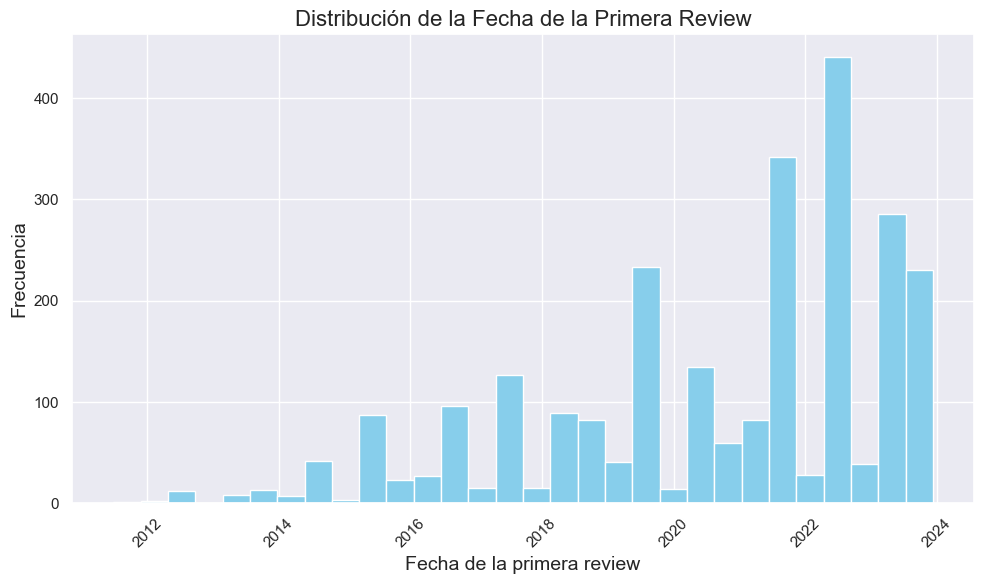

In [41]:
nuevo_listings['first_review'] = pd.to_datetime(nuevo_listings['first_review'])

plt.figure(figsize=(10, 6))
plt.hist(nuevo_listings['first_review'], bins=30, color='skyblue')

plt.xlabel('Fecha de la primera review', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de la Fecha de la Primera Review', fontsize=16)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Algunos de los propietarios reciben sus primeras reseñas en 2012, que desde entonces han crecido progresivamente durante los meses de más turismo del año (concretamente en verano). Justo tras el COVID se muestra un repunte de nuevas propiedades en la plataforma con sus correspodientes nuevas reseñas.

In [42]:
print(nuevo_listings['host_response_rate'].head(15))

id
102558    100%
285865    100%
294398     50%
295705     50%
334376     60%
357026    100%
358378    100%
366358    100%
366636    100%
370676     NaN
372756     50%
382144     60%
394135    100%
403664     60%
425853    100%
Name: host_response_rate, dtype: object


## 3. 2 Tiempo de respuesta

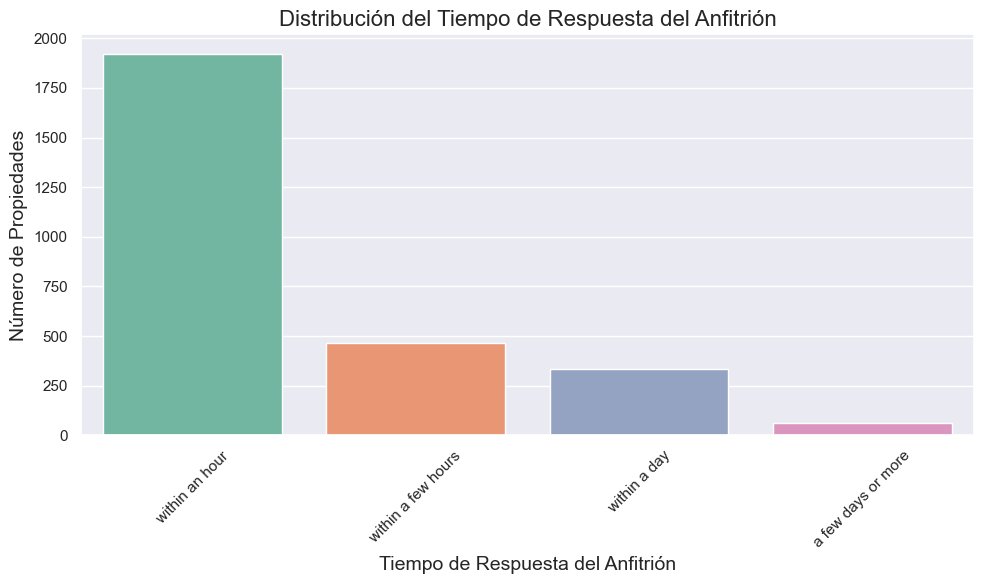

In [43]:
order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

# Graficar para host_response_time con el orden especificado
plt.figure(figsize=(10, 6))
sns.countplot(data=nuevo_listings, x='host_response_time', palette='Set2', order=order)

# Añadir etiquetas y título
plt.xlabel('Tiempo de Respuesta del Anfitrión', fontsize=14)
plt.ylabel('Número de Propiedades', fontsize=14)
plt.title('Distribución del Tiempo de Respuesta del Anfitrión', fontsize=16)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Observamos que por lo general los anfitriones contestan en una hora o menos, y muy pocos tardan más de un día. Esto es algo muy positovo a la hora de evaluar un alojamiento, haciendo que los huespedes se sientan acompañados desde el principio.

# 3. 3 Superhosts

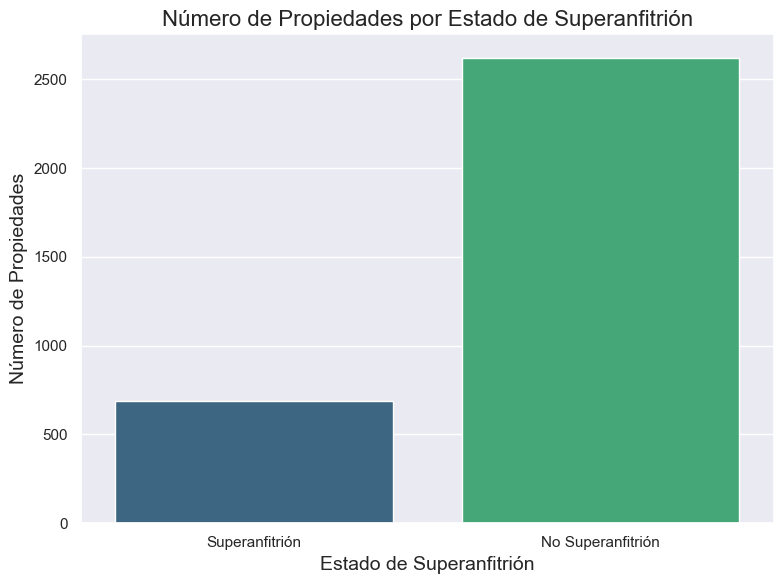

In [44]:
# Contar el número de propiedades según el estado de 'host_is_superhost'
total_count = nuevo_listings.shape[0]
superhost_count = nuevo_listings[nuevo_listings['host_is_superhost'] == 't'].shape[0]
non_superhost_count = total_count - superhost_count

# Crear un DataFrame con los resultados
data = {'Estado': ['Superanfitrión', 'No Superanfitrión'], 'Conteo': [superhost_count, non_superhost_count]}
count_df = pd.DataFrame(data)

# Graficar el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Estado', y='Conteo', data=count_df, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Estado de Superanfitrión', fontsize=14)
plt.ylabel('Número de Propiedades', fontsize=14)
plt.title('Número de Propiedades por Estado de Superanfitrión', fontsize=16)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Cerca de 700 anfitriones cuentan con la distinción de Superhost, lo que significa que tanto el anfitrion como el alojamiento cuenta con unas condiciones óptimas de respuesta, cuidado y limpieza. Esto es cerca de 1/6 del número total de anfitriones, siendo más de 2500 los que NO Superhosts.

<Axes: xlabel='Estado', ylabel='Conteo'>

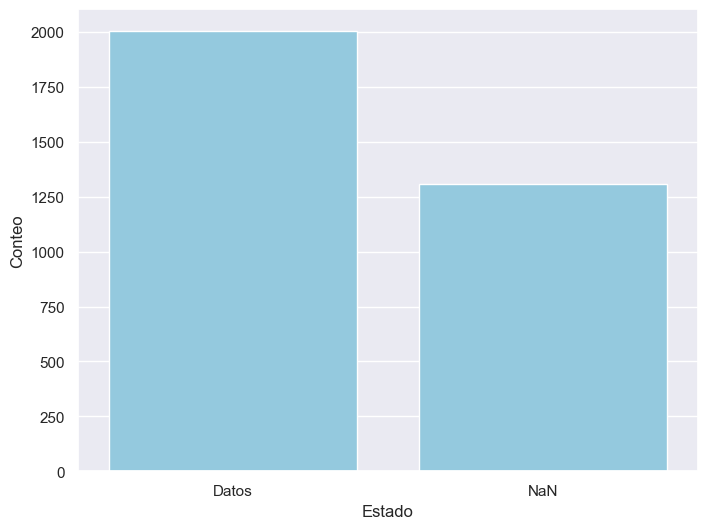

In [45]:
total_count = nuevo_listings['license'].shape[0]
non_null_count = nuevo_listings['license'].count()
null_count = total_count - non_null_count

data = {'Estado': ['Datos', 'NaN'], 'Conteo': [non_null_count, null_count]}
count_df = pd.DataFrame(data)
    
plt.figure(figsize=(8, 6))
sns.barplot(x='Estado', y='Conteo', data=count_df, color='skyblue')

Podemos observar que cerca de 2000 de los más de los 3100 alojamientos listados en AirBnb cuentan con la pertinente licencia turística, mientras que casi 1300 no la tienen en vigor o no la tienen correctamente subida a la página.

Según Menorca.com, en el mes de Mayo de 2024 más de 400 propietarios 'corrigieron' sus anuncios para mostrar el número de la preceptiva licencia turística aumentando estos en un 32%, después de que el gobierno insular decidiese tomar medidas en cuanto a los pisos turísticos ilegales.

Podemos observar que cuando se trata de los superhosts, el número de casas sin licencia disminuye, como podemos observar a continuación.

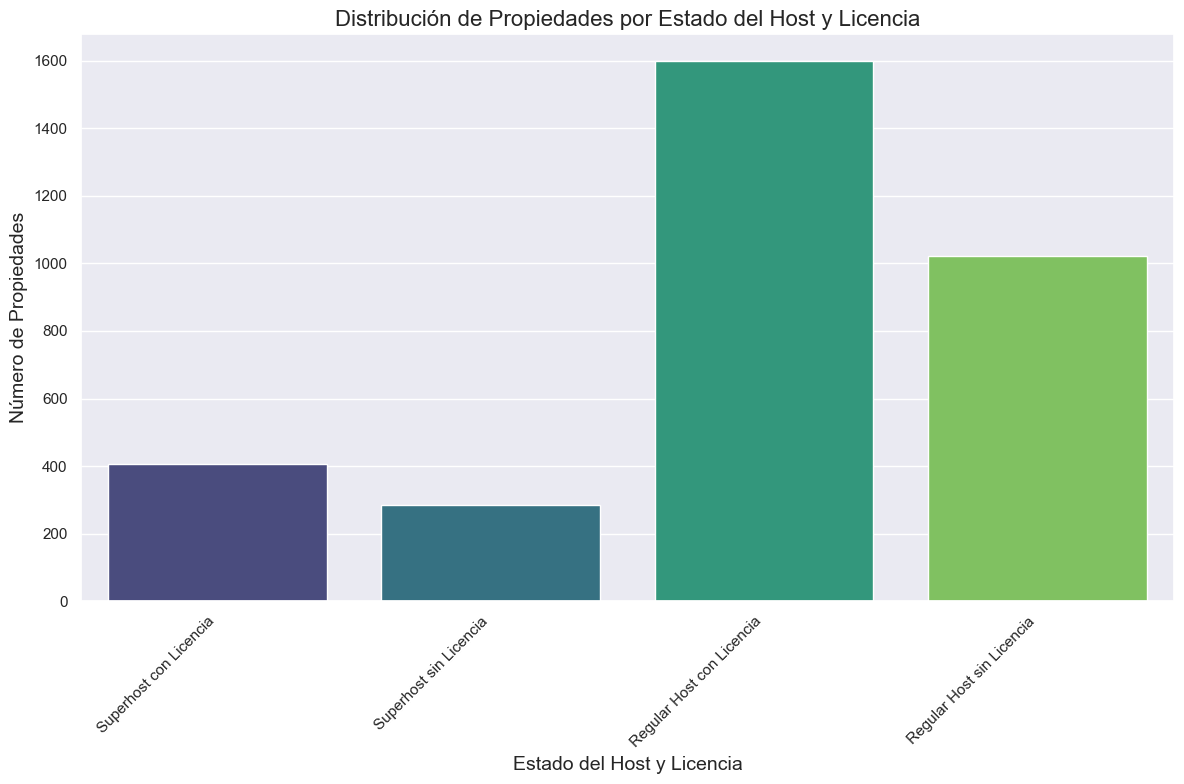

In [46]:

total_count = nuevo_listings.shape[0]
superhost_count_with_license = nuevo_listings[(nuevo_listings['host_is_superhost'] == 't') & nuevo_listings['license'].notnull()].shape[0]
superhost_count_no_license = nuevo_listings[(nuevo_listings['host_is_superhost'] == 't') & nuevo_listings['license'].isnull()].shape[0]
non_superhost_count_with_license = nuevo_listings[(nuevo_listings['host_is_superhost'] == 'f') & nuevo_listings['license'].notnull()].shape[0]
non_superhost_count_no_license = nuevo_listings[(nuevo_listings['host_is_superhost'] == 'f') & nuevo_listings['license'].isnull()].shape[0]

# Crear un DataFrame con los resultados
data = {
    'Estado': ['Superhost con Licencia', 'Superhost sin Licencia', 'Regular Host con Licencia', 'Regular Host sin Licencia'], 
    'Conteo': [superhost_count_with_license, superhost_count_no_license, non_superhost_count_with_license, non_superhost_count_no_license]
}
count_df = pd.DataFrame(data)

# Graficar el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Estado', y='Conteo', data=count_df, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Estado del Host y Licencia', fontsize=14)
plt.ylabel('Número de Propiedades', fontsize=14)
plt.title('Distribución de Propiedades por Estado del Host y Licencia', fontsize=16)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


En esta gráfica observamos que no hay una correlación entre la licencia y los superhosts, sindo la diferencia en términos proporcionales igual entre los superhosts con y sin licencia y los no superhosts con y sin licencia.